This is the Supervised Learning Capstone for Thinkful. The data set choosen for this capstone is the PUBG data set from Kaggle Competition. The link of the Kaggle competition is listed below.

> 



https://www.kaggle.com/c/pubg-finish-placement-prediction


> 



The goal for this project is to predict the Win Placement Percentage for each player. The Win Prediction Percentage is ranged from 0 to 1. 

First, I will explore the data set and perform data cleaning as well. The data cleaning here have two purposes. 
1. Clean up the data and perform feature engineering, in order to maximized the accuracy of the prediction model. 
2. Using data analysis techniques to find outliners, unsual game data, and cheaters. 

In the Kaggle competition, there is a training data set, and testing data set. The testing data set is missing the Win Prediction Percentage column, which is for competition submission. However, I am not joing the kaggle competition for now, I will be only using the training data set for this capstone. MAE (Mean Absolute Error) will be used to measure the performance of the model. 




In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import time

sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

In [0]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
raw_df = pd.read_csv('./gdrive/My Drive/PUBG Data/train_V2.csv')

## Exploratory data analysis, feature engineering, and find the cheaters.

In [5]:
print('Shape of Data Set: ' + str(raw_df.shape))
raw_df.head(5)

Shape of Data Set: (4446966, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [7]:
raw_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
#Try to find all players in this game, and try to drop it. 
raw_df[raw_df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
raw_df[raw_df['matchId'] == '224a123c53e008']

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [0]:
df = raw_df.drop(2744604, axis=0)

After checking for null values in the data set. There is one null value in winPlacePerc. Checking on this particular game, it seems like this is an invalid game and I will drop this game from the data set. 

In [11]:
print('Shape of Data Set: ' + str(df.shape))

Shape of Data Set: (4446965, 29)


In [12]:
pd.set_option('float_format', '{:.3f}'.format)
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000,4446965.000
mean,0.234,1.107,130.717,0.658,0.227,1.370,47.599,505.006,0.925,0.544,22.998,1579.507,44.505,43.008,892.010,0.165,606.116,0.003,4.509,0.024,0.008,1154.218,3.660,606.460,0.473
std,0.589,1.716,170.781,1.146,0.602,2.680,27.463,627.505,1.558,0.711,50.973,258.739,23.828,23.289,736.648,0.472,1498.344,0.073,30.502,0.167,0.093,1183.497,2.457,739.700,0.307
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,133.000,2.000,1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,0.000,1367.000,28.000,27.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,155.100,2.000,0.000,0.200
50%,0.000,0.000,84.240,0.000,0.000,0.000,47.000,0.000,0.000,0.000,0.000,1438.000,30.000,30.000,1443.000,0.000,0.000,0.000,0.000,0.000,0.000,685.600,3.000,0.000,0.458
75%,0.000,2.000,186.000,1.000,0.000,2.000,71.000,1172.000,1.000,1.000,21.320,1851.000,49.000,47.000,1500.000,0.000,0.191,0.000,0.000,0.000,0.000,1976.000,5.000,1495.000,0.741
max,22.000,33.000,6616.000,53.000,64.000,80.000,101.000,2170.000,72.000,20.000,1094.000,2237.000,100.000,100.000,5910.000,39.000,40710.000,18.000,3823.000,12.000,5.000,25780.000,236.000,2013.000,1.000


# Exploratory Data Analysis

In [0]:
#Create new features totalPlayers
df['totalPlayers'] = df.groupby('matchId')['matchId'].transform('count')
#df['totalPlayers'].value_counts(ascending = False)

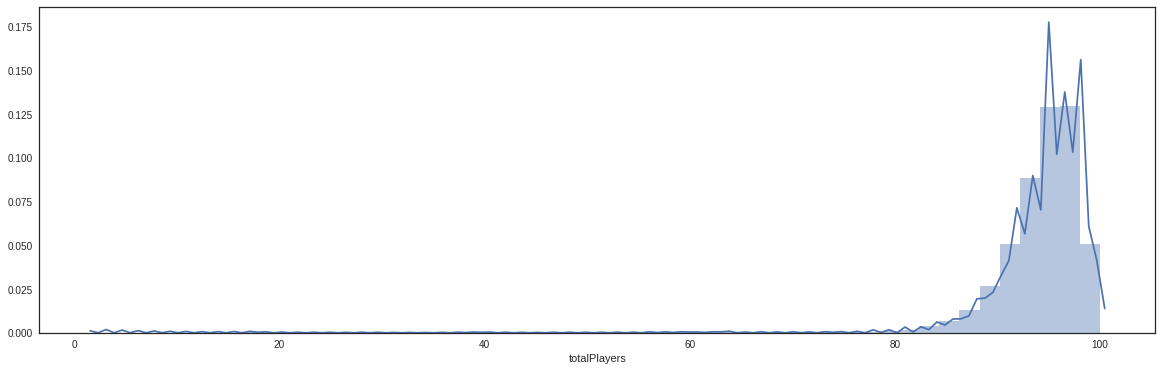

In [14]:
plt.figure(figsize=(20,6))
sns.distplot(df['totalPlayers'])
sns.plt.show()

I will delete flaretpp, flarefpp, crashfpp, crashtpp from data set, because these are special game modes. Also, I will check on the distribution of winPlacePerc for all these game modes, and see if I can group them together based on solo, duo, and squad. 

In [0]:
#Ask about the plot limit
#plt.figure(figsize=(8,6))
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'solo'], label='solo',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'solo-fpp'], label='solo-fpp',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'normal-solo-fpp'], label='normal-solo-fpp',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'normal-solo'],label='normal-solo', cut=0)
#plt.xlabel('WinPlacePercentage')
#sns.plt.show()

In [0]:
#plt.figure(figsize=(8,6))
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'duo'], label='duo',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'duo-fpp'], label='duo-fpp',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'normal-duo-fpp'], label='normal-duo-fpp',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'normal-duo'],label='normal-duo', cut=0)
#plt.xlabel('WinPlacePercentage')
#sns.plt.show()

In [0]:
#plt.figure(figsize=(8,6))
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'squad'], label='squad',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'squad-fpp'], label='squad-fpp',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'normal-squad-fpp'], label='normal-squad-fpp',cut=0)
#sns.kdeplot(df_noSpecial['winPlacePerc'].loc[df_noSpecial['matchType'] == 'normal-squad'],label='normal-squad', cut=0)
#plt.xlabel('WinPlacePercentage')
#sns.plt.show()

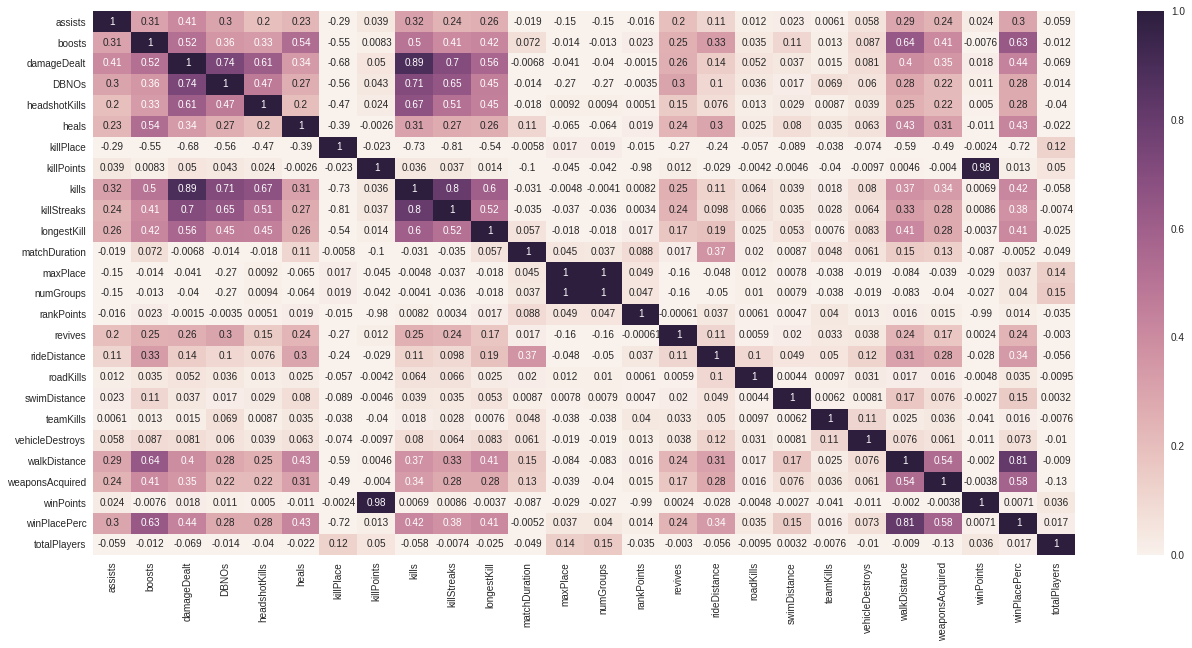

In [18]:
corr = df.corr()
plt.figure(figsize=(22,10))
sns.heatmap(corr, vmin=0, vmax=1, annot=True, cbar=True, annot_kws={"size": 10})

In [0]:
df_random_plot = df.sample(n=4000,random_state=4)

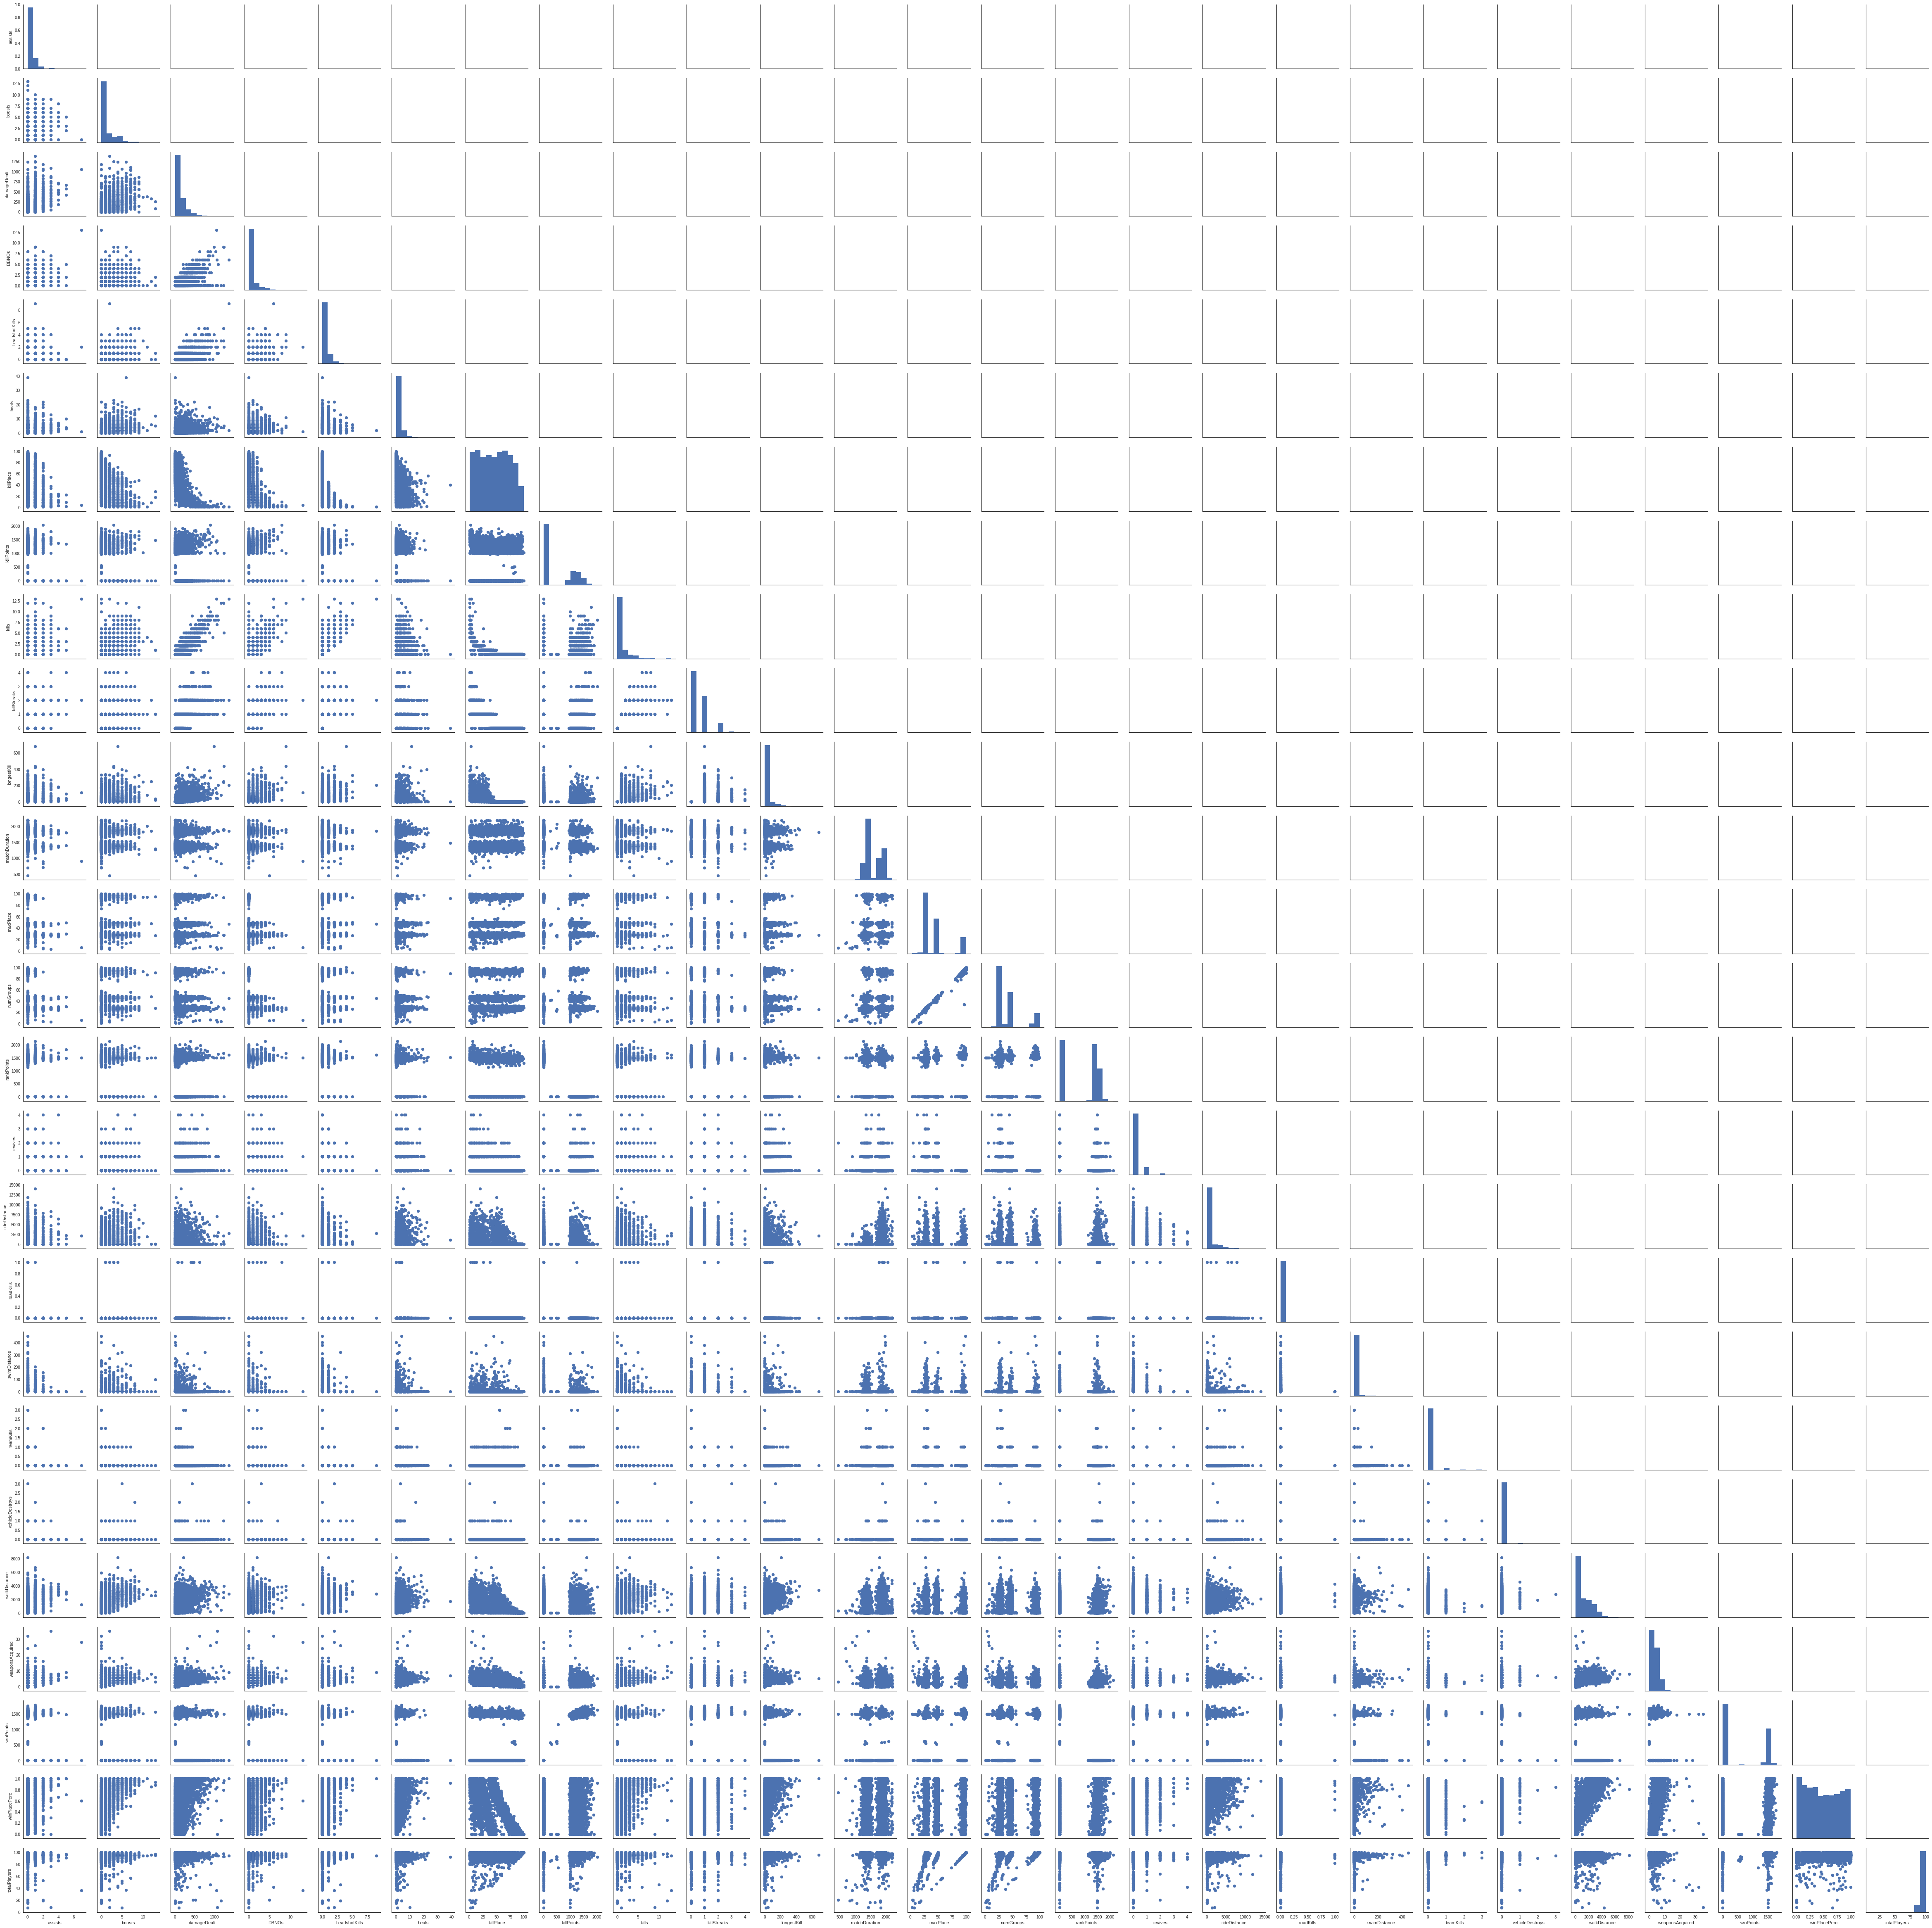

In [20]:
g = sns.PairGrid(df_random_plot.dropna(), diag_sharey=False)
g.map_diag(plt.hist)
g.map_lower(plt.scatter)
plt.show()

Looking at the pairgrid plot, there are a few plots that are interesting. The two histograms that did not skewed heavily to the lfet side, and maxPlace and numGroups that looks multi motality to me. 

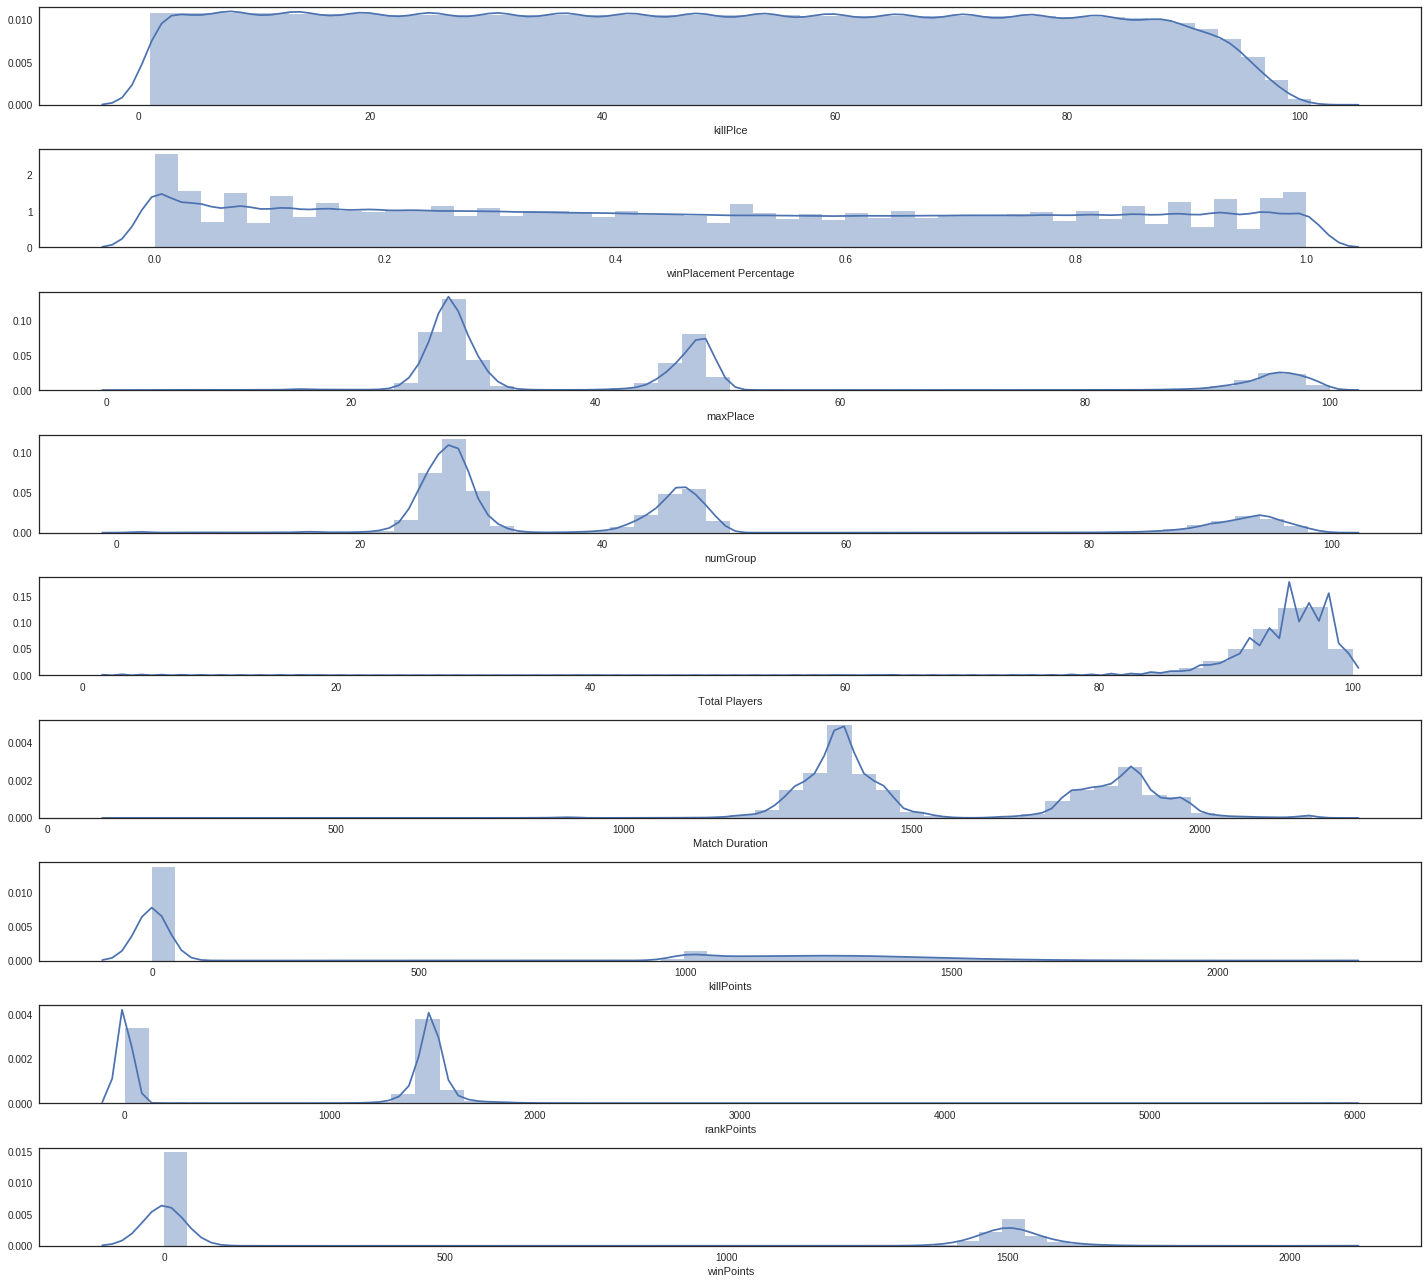

In [21]:
plt.figure(figsize=(20,18))

plt.subplot(9, 1, 1)
sns.distplot(df['killPlace'])
plt.xlabel("killPlce")

plt.subplot(9, 1, 2)
sns.distplot(df['winPlacePerc'])
plt.xlabel("winPlacement Percentage")

plt.subplot(9, 1, 3)
sns.distplot(df['maxPlace'])
plt.xlabel("maxPlace")

plt.subplot(9, 1, 4)
sns.distplot(df['numGroups'])
plt.xlabel("numGroup")

plt.subplot(9, 1, 5)
sns.distplot(df['totalPlayers'])
plt.xlabel("Total Players")

plt.subplot(9, 1, 6)
sns.distplot(df['matchDuration'])
plt.xlabel("Match Duration")

plt.subplot(9, 1, 7)
sns.distplot(df['killPoints'])
plt.xlabel("killPoints")

plt.subplot(9, 1, 8)
sns.distplot(df['rankPoints'])
plt.xlabel("rankPoints")

plt.subplot(9, 1, 9)
sns.distplot(df['winPoints'])
plt.xlabel("winPoints")

plt.tight_layout()

plt.show()

# Data Cleaning and Find Cheaters

### Find and clean cheaters. 

In [0]:
#Create new feature totalDistance
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

#For players not getting kills, we will make their headshot rate equals to 0, since they did not make any kills. 
df['headShotrate'] = df['headshotKills']/df['kills']
df['headShotrate'].fillna(0, inplace=True)

df['healandboost'] = df['heals'] + df['boosts']
df['distance_per_kill'] = df['totalDistance']/df['kills']
df['heal_per_Kill'] = df['healandboost']/df['kills']
df['weapon_per_kill'] = df['weaponsAcquired']/df['kills']
df['damage_per_kill'] = df['damageDealt']/df['kills']
df['knock_per_kill'] = df['DBNOs']/df['kills']
df.replace([np.inf, np.NINF], np.nan, inplace=True)
df.fillna(0,inplace=True)

In [0]:
#Kill people without moving. 
df_noMove_butKill = df[(df['kills'] > 0) & (df['totalDistance'] == 0)]
df.drop(df_noMove_butKill.index,axis=0,inplace=True)

In [0]:
#Knock down people without moving
df_noMove_butKnock = df[(df['DBNOs'] > 0) & (df['totalDistance'] == 0)]
df.drop(df_noMove_butKnock.index, axis=0, inplace=True)

In [0]:
#Moving small amount of distance but gets lots of kills. 
df_killTooMuch_moveLess = df[(df['kills'] >= 50) & (df['totalDistance']<1000)]
df.drop(df_killTooMuch_moveLess.index, axis=0, inplace=True)

In [0]:
#Riding a vehicle in extremely short distance but killed someone. 
df_noRide_butKill = df[(df['roadKills'] >0) & (df['rideDistance'] < 1)]
df.drop(df_noRide_butKill.index, axis=0, inplace=True)

In [0]:
#Acquired unusual amount of weapons without moving
df_noMove_butWeapon = df[(df['weaponsAcquired']>10) & (df['totalDistance']==0)]
df.drop(df_noMove_butWeapon.index, axis=0, inplace=True)

In [0]:
#Acquired unusual amount of weapons but only traveled a short total distance. 
df_tooMuchWeapon_moveLess = df[(df['weaponsAcquired']>50) & (df['totalDistance']<1000)]
df.drop(df_tooMuchWeapon_moveLess.index, axis=0, inplace=True)

In [0]:
#Plaers getting unusual high headshot rate. 
df_headshotTooMuch = df[(df['headShotrate'] == 1) & (df['kills']>5)]
df.drop(df_headshotTooMuch.index, axis=0, inplace=True)

In [0]:
#Acquired unusual amount of weapons but only traveled a short distance. 
df_tooMuchWeapon_moveLess = df[(df['weaponsAcquired'] >= 20) & (df['totalDistance'] <= 50)]
df.drop(df_tooMuchWeapon_moveLess.index, axis=0, inplace=True)

In [0]:
#Did not dealt any damage or any kills, play in solo, but used unusual amount of heal and boost items. 
df_tooMuchHeal_noKill_solo = df[(df['heals'] >15) & (df['boosts'] > 10) & (df['kills'] == 0) & (df['damageDealt'] == 0) & (df['matchType'] == 'solo')]
df.drop(df_tooMuchHeal_noKill_solo.index, axis=0, inplace=True)

In [32]:
df.shape

(4444022, 38)

### First Attempt, delete special match type. 

In [33]:
# Check match Types. 
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [0]:
df_special_game = df[df['matchType'].isin(['flaretpp','crashfpp','flarefpp','crashtpp'])]
df_noSpecial = df.drop(df_special_game.index.tolist(), axis=0)

In [35]:
df_noSpecial['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp',
       'normal-duo', 'normal-squad', 'normal-solo'], dtype=object)

In [36]:
df_noSpecial.shape

(4434144, 38)

In [0]:
#Some games there are more kills than total players in game. Possible zombie game mode. 
df_zombie = df[df['kills'] > df['totalPlayers']]
df_zombie_game = df[df['matchId'].isin(df_zombie['matchId'].unique().tolist())]

In [0]:
df_noSpecial.drop(df_zombie_game.index, axis=0, inplace=True)

## Prepare our model

In [0]:
df_random_noSpecial = df_noSpecial.sample(n=10000,random_state=4)

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_random_noSpecial['matchType'])
df_random_noSpecial['LabelEncoted_matchType'] = le.transform(df_random_noSpecial['matchType'])

In [0]:
X_random_noSpecial = df_random_noSpecial.drop(['Id','groupId','matchId','killPoints','rankPoints','winPoints','matchType','winPlacePerc'], axis=1)
Y_random_noSpecial = df_random_noSpecial['winPlacePerc']

In [0]:
from sklearn.model_selection import train_test_split

X_train_random, X_test_random, Y_train_random, Y_test_random = train_test_split(X_random_noSpecial, Y_random_noSpecial, test_size=0.3, random_state=44)

In [0]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [0]:
#LGB_params = {'learning_rate':[0.1,0.2,0.3,0.4,0.5],'objective':['mae'],'metric':['mae'],'num_leaves':[31,50,100,200],
#              'bagging_fraction':[0.1,0.3,0.5,0.7],'feature_fraction':[0.1,0.2,0.3,0.4,0.5],
#             'max_depth':[1,2,3,4,5],'num_iterations':[10,50,100,200],'tree_learner':['voting']}
              
#LGB_grid = GridSearchCV(lgb.LGBMRegressor(), LGB_params, cv=3, scoring='neg_mean_absolute_error',n_jobs=-1, verbose=20)
#LGB_grid.fit(X_train_random, Y_train_random)

#print(('The best parameters for this model is: {}\n'
#      'The best score for this model is: {}').format(LGB_grid.best_params_, LGB_grid.best_score_))

You could train model using a different loss function. 


### Light GBM Result

Done 24000 out of 24000 | elapsed: 35.7min finished
The best parameters for this model is: {'bagging_fraction': 0.1, 'feature_fraction': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'metric': 'mae', 'num_iterations': 200, 'num_leaves': 50, 'objective': 'mae', 'tree_learner': 'voting'}
The best score for this model is: -0.0671651097774801

In [45]:
LGB_param_mae = {'bagging_fraction':0.1,'feature_fraction': 0.5,'learning_rate':0.2,
             'max_depth':5,'metric':'mae','num_iterations':200,'num_leaves':50,
                 'tree_learner':'voting', 'objective':'regression'}

lgb_train = lgb.Dataset(X_train_random, Y_train_random)
lgb_valid = lgb.Dataset(X_test_random, Y_test_random, reference=lgb_train)

evals_result_mae={}

gbm_mae = lgb.train(LGB_param_mae,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_valid],
                evals_result=evals_result_mae)

[1]	training's l1: 0.221331	valid_1's l1: 0.22131
[2]	training's l1: 0.184972	valid_1's l1: 0.185291
[3]	training's l1: 0.157795	valid_1's l1: 0.15835
[4]	training's l1: 0.141345	valid_1's l1: 0.142469
[5]	training's l1: 0.12333	valid_1's l1: 0.125117
[6]	training's l1: 0.109021	valid_1's l1: 0.111696
[7]	training's l1: 0.0979383	valid_1's l1: 0.101504
[8]	training's l1: 0.0901217	valid_1's l1: 0.0939487
[9]	training's l1: 0.0864789	valid_1's l1: 0.090738
[10]	training's l1: 0.0803821	valid_1's l1: 0.0849811
[11]	training's l1: 0.075499	valid_1's l1: 0.0805552
[12]	training's l1: 0.0720517	valid_1's l1: 0.0772453
[13]	training's l1: 0.0698412	valid_1's l1: 0.0751192
[14]	training's l1: 0.0678707	valid_1's l1: 0.0732914
[15]	training's l1: 0.066007	valid_1's l1: 0.0715032
[16]	training's l1: 0.0653112	valid_1's l1: 0.0709038
[17]	training's l1: 0.0640857	valid_1's l1: 0.0698855
[18]	training's l1: 0.0633884	valid_1's l1: 0.0693947
[19]	training's l1: 0.0624302	valid_1's l1: 0.0687281
[2

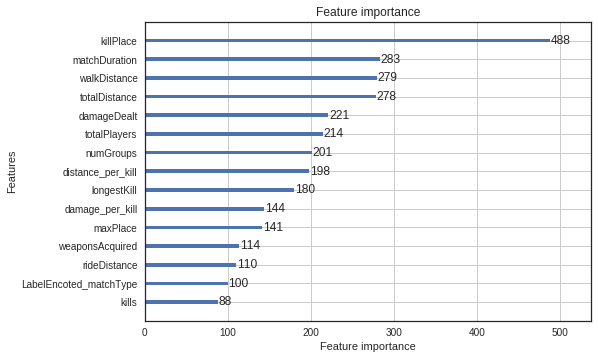

In [46]:
ax = lgb.plot_importance(gbm_mae, max_num_features=15)
plt.show()

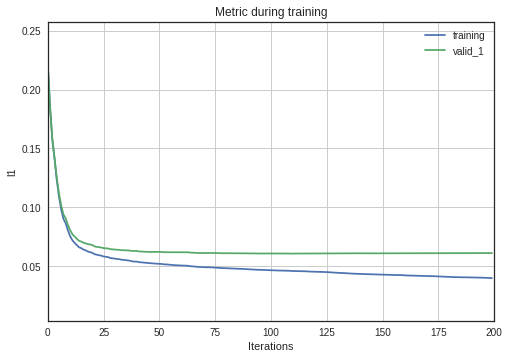

In [47]:
lgb.plot_metric(evals_result_mae)
plt.show()

In [48]:
Y_pred_mae = gbm_mae.predict(X_test_random,num_iteration=gbm_mae.best_iteration)
#print('The MSE for the Random Sampled Test Data is:', mean_squared_error(Y_test_random, Y_pred_mse))
print('The MAE for the Random Sampled Test Data is:', mean_absolute_error(Y_test_random, Y_pred_mae))

The MAE for the Random Sampled Test Data is: 0.06116037141471433


In [49]:
LGB_param_mse = {'bagging_fraction':0.1,'feature_fraction': 0.5,'learning_rate':0.2,
             'max_depth':5,'metric':'mse','num_iterations':200,'num_leaves':50,
                 'tree_learner':'voting'}

evals_result_mse={}

gbm_mse = lgb.train(LGB_param_mse,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_valid],
                evals_result=evals_result_mse)

[1]	training's l2: 0.0654672	valid_1's l2: 0.0649976
[2]	training's l2: 0.0465045	valid_1's l2: 0.0464868
[3]	training's l2: 0.0343773	valid_1's l2: 0.0346554
[4]	training's l2: 0.0280828	valid_1's l2: 0.0286074
[5]	training's l2: 0.0220497	valid_1's l2: 0.0228171
[6]	training's l2: 0.01783	valid_1's l2: 0.0188715
[7]	training's l2: 0.0149856	valid_1's l2: 0.0162854
[8]	training's l2: 0.0131139	valid_1's l2: 0.0144888
[9]	training's l2: 0.0122926	valid_1's l2: 0.0138041
[10]	training's l2: 0.0109371	valid_1's l2: 0.0125209
[11]	training's l2: 0.009919	valid_1's l2: 0.0116327
[12]	training's l2: 0.00923608	valid_1's l2: 0.0109546
[13]	training's l2: 0.00884569	valid_1's l2: 0.0105679
[14]	training's l2: 0.00848908	valid_1's l2: 0.0102333
[15]	training's l2: 0.00816169	valid_1's l2: 0.00995799
[16]	training's l2: 0.00802096	valid_1's l2: 0.00984092
[17]	training's l2: 0.00781973	valid_1's l2: 0.00970942
[18]	training's l2: 0.00768625	valid_1's l2: 0.00964962
[19]	training's l2: 0.0075046

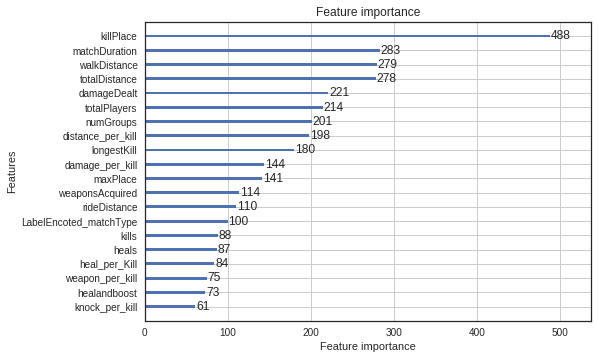

In [50]:
lgb.plot_importance(gbm_mse, max_num_features=20)
plt.show()

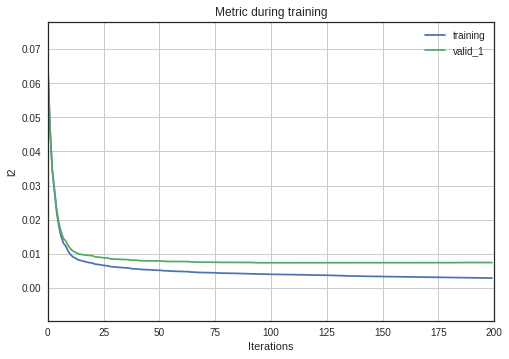

In [51]:
lgb.plot_metric(evals_result_mse)
plt.show()

In [52]:
Y_pred_mse = gbm_mse.predict(X_test_random,num_iteration=gbm_mse.best_iteration)
#print('The MSE for the Random Sampled Test Data is:', mean_squared_error(Y_test_random, Y_pred_mse))
print('The MAE for the Random Sampled Test Data is:', mean_absolute_error(Y_test_random, Y_pred_mse))

The MAE for the Random Sampled Test Data is: 0.06116037141471433


### Light GBM with full dataset and without cleaning special games. 

In [0]:
le_normal = preprocessing.LabelEncoder()
le_normal.fit(df['matchType'])
df['LabelEncoted_matchType'] = le_normal.transform(df['matchType'])

In [0]:
X_normal = df.drop(['Id','groupId','matchId','killPoints','rankPoints','winPoints','matchType','winPlacePerc'], axis=1)
Y_normal = df['winPlacePerc']

In [55]:
df.columns.get_loc('LabelEncoted_matchType')

38

In [0]:
X_train_normal, X_test_normal, Y_train_normal, Y_test_normal = train_test_split(X_normal, Y_normal, test_size=0.3, random_state=44)

In [57]:
lgb_train_normal = lgb.Dataset(X_train_normal, Y_train_normal)
lgb_valid_normal = lgb.Dataset(X_test_normal, Y_test_normal, reference=lgb_train_normal)


LGB_param_normal = {'bagging_fraction':0.1,'feature_fraction': 0.5,'learning_rate':0.2,
             'max_depth':5,'metric':'mae','num_iterations':200,'num_leaves':50,
                 'tree_learner':'voting', 'verbosity':2}

evals_result_normal={}

gbm_normal = lgb.train(LGB_param_normal,
                lgb_train_normal,
                num_boost_round=200,
                valid_sets=[lgb_train_normal, lgb_valid_normal],
                categorical_feature=[38],evals_result=evals_result_normal)

[1]	training's l1: 0.222733	valid_1's l1: 0.222724
[2]	training's l1: 0.186594	valid_1's l1: 0.186579
[3]	training's l1: 0.159536	valid_1's l1: 0.159515
[4]	training's l1: 0.143725	valid_1's l1: 0.14369
[5]	training's l1: 0.125577	valid_1's l1: 0.125548
[6]	training's l1: 0.111548	valid_1's l1: 0.111538
[7]	training's l1: 0.101027	valid_1's l1: 0.101038
[8]	training's l1: 0.0929893	valid_1's l1: 0.0930175
[9]	training's l1: 0.0894429	valid_1's l1: 0.0894641
[10]	training's l1: 0.0842476	valid_1's l1: 0.0842892
[11]	training's l1: 0.080024	valid_1's l1: 0.0800831
[12]	training's l1: 0.0765473	valid_1's l1: 0.0766122
[13]	training's l1: 0.0742302	valid_1's l1: 0.0743011
[14]	training's l1: 0.0725884	valid_1's l1: 0.0726642
[15]	training's l1: 0.0707104	valid_1's l1: 0.0707989
[16]	training's l1: 0.0700907	valid_1's l1: 0.0701887
[17]	training's l1: 0.0691188	valid_1's l1: 0.069224
[18]	training's l1: 0.0686048	valid_1's l1: 0.0687134
[19]	training's l1: 0.0671067	valid_1's l1: 0.0672185


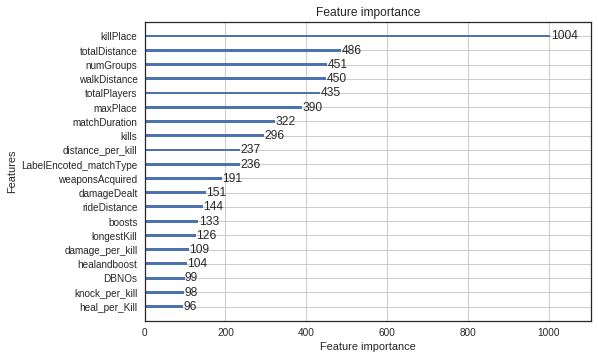

In [58]:
lgb.plot_importance(gbm_normal, max_num_features=20)
plt.show()

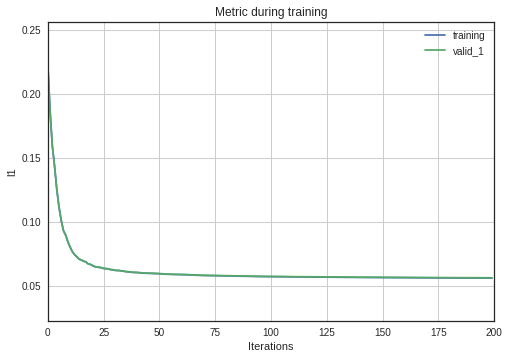

In [59]:
lgb.plot_metric(evals_result_normal)
plt.show()

In [60]:
Y_pred_normal = gbm_normal.predict(X_test_normal,num_iteration=gbm_normal.best_iteration)
print('The MAE for the Normal Test Data is:', mean_absolute_error(Y_test_normal, Y_pred_normal))

The MAE for the Normal Test Data is: 0.05619792570826029


### Additional Graphic to support the powerpoint presentation

In [0]:
plt.figure(figsize=(14,7), dpi=400)

sns.countplot(raw_df['kills'])
plt.xlabel("Number of Kills")
plt.title('Count of Kills',fontsize=24)

In [0]:
plt.figure(figsize=(14,7), dpi=300)

sns.countplot(df['totalPlayers'])
plt.xlabel("Number of players per game")
plt.xlim(60,100)
plt.title('Count of Players per Game', fontsize=24)


In [0]:
plt.figure(figsize=(14,7), dpi=300)

sns.countplot(df['healandboost'])
plt.xlabel("Number of Item Acquired")
plt.xlim(-1,40)
plt.title('Number of Heal and Boost Item Acquired', fontsize=24)

In [0]:
plt.figure(figsize=(14,7), dpi=300)

plt.hist(df['totalDistance'], bins=[0,200,400,600,800,1000,1200,1400,1600,1800,2000],rwidth=0.95)
plt.xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000])
plt.xlabel("Total Traveled Distance")
plt.title('Distribution of Total Traveled Distance', fontsize=24)

In [0]:
plt.figure(figsize=(20,7), dpi=300)

sns.countplot(df['matchType'])
plt.xlabel('match Type')
plt.title('Number of Different Match Types', fontsize=24)

In [0]:
plt.figure(figsize=(14,7), dpi=300)

plt.hist(df['winPlacePerc'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel("Win Placement Percentage")
plt.title('Distribution of Win Placement Percentage', fontsize=24)

In [0]:
plt.figure(figsize=(20,12))

plt.subplot(6, 1, 1)
plt.hist(df['maxPlace'], bins=40)
plt.xlabel("Maximum(Worst) Placement")

plt.subplot(6, 1, 2)
plt.hist(df['numGroups'], bins=40)
plt.xlabel("Number of Groups")

plt.subplot(6, 1, 3)
plt.hist(df['matchDuration'], bins=40)
plt.xlabel("Match Duration")

plt.subplot(6, 1, 4)
plt.hist(df['killPoints'], bins=40)
plt.xlabel("killPoints")

plt.subplot(6, 1, 5)
plt.hist(df['rankPoints'], bins=40)
plt.xlabel("rankPoints")

plt.subplot(6, 1, 6)
plt.hist(df['winPoints'], bins=40)
plt.xlabel("winPoints")

plt.tight_layout()

plt.show()